In [140]:
# packages
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import time
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [141]:
# import du csv
data = pd.read_csv('heart.csv')

In [142]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1,0,125.0,212,0,1,168,0,1.0,2,2,3,0
1,53.0,1,0,140.0,203,1,0,155,1,3.1,0,0,3,0
2,70.0,1,0,NaN,174,0,1,125,1,2.6,0,0,3,0
3,61.0,1,0,148.0,203,0,1,161,0,0.0,2,1,3,0
4,62.0,0,0,138.0,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59.0,1,1,140.0,221,0,1,164,1,0.0,2,0,2,1
1021,60.0,1,0,125.0,258,0,0,141,1,2.8,1,1,3,0
1022,47.0,1,0,110.0,275,0,0,118,1,1.0,1,1,2,0
1023,50.0,0,0,110.0,254,0,0,159,0,0.0,2,0,2,1


In [143]:
stat_analysis = ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

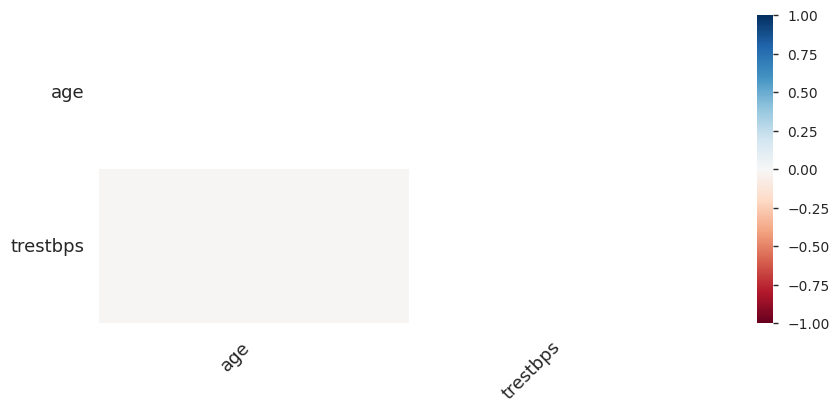

In [144]:
stat_analysis

In [145]:
# Count des valeurs
data['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [146]:
# Suppression des NaaN
data.dropna(inplace=True)



In [147]:
data['target'].value_counts()

target
1    520
0    481
Name: count, dtype: int64

In [148]:
data['age'] = data['age'].astype(int)
data['trestbps'] = data['trestbps'].astype(int)

In [149]:
# Suppresion des colonnes inutiles
#data.drop(labels=['Name'], axis=1, inplace=True)

In [150]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


### Decision tree

In [201]:
# Définition du modèles
Y = data['target']
X = data.drop(labels=['target'], axis=1)

# Split test/train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=700)

# Appel de l'abre de décision
clf = DecisionTreeClassifier(
    criterion= 'entropy',
    max_depth = 4,
    max_leaf_nodes = None, 
    min_samples_leaf = 20,
    min_samples_split = 20
)

# Ajustement des doonées
clf = clf.fit(X_train, Y_train)


# Estimation du test
estimate = clf.predict_proba(X_test)[:,1]


true = Y_test
# build AUC
fpr, tpr, _ = roc_curve(Y_test,  estimate)
auc_ = auc(fpr, tpr)

print(abs(estimate - true).mean())
print(abs(estimate - true).std())


SyntaxError: invalid syntax (4114849992.py, line 9)

In [152]:
print(auc_)

0.9797374792914489


L'AUC est proche de 1 ce qui est satisfaisant.

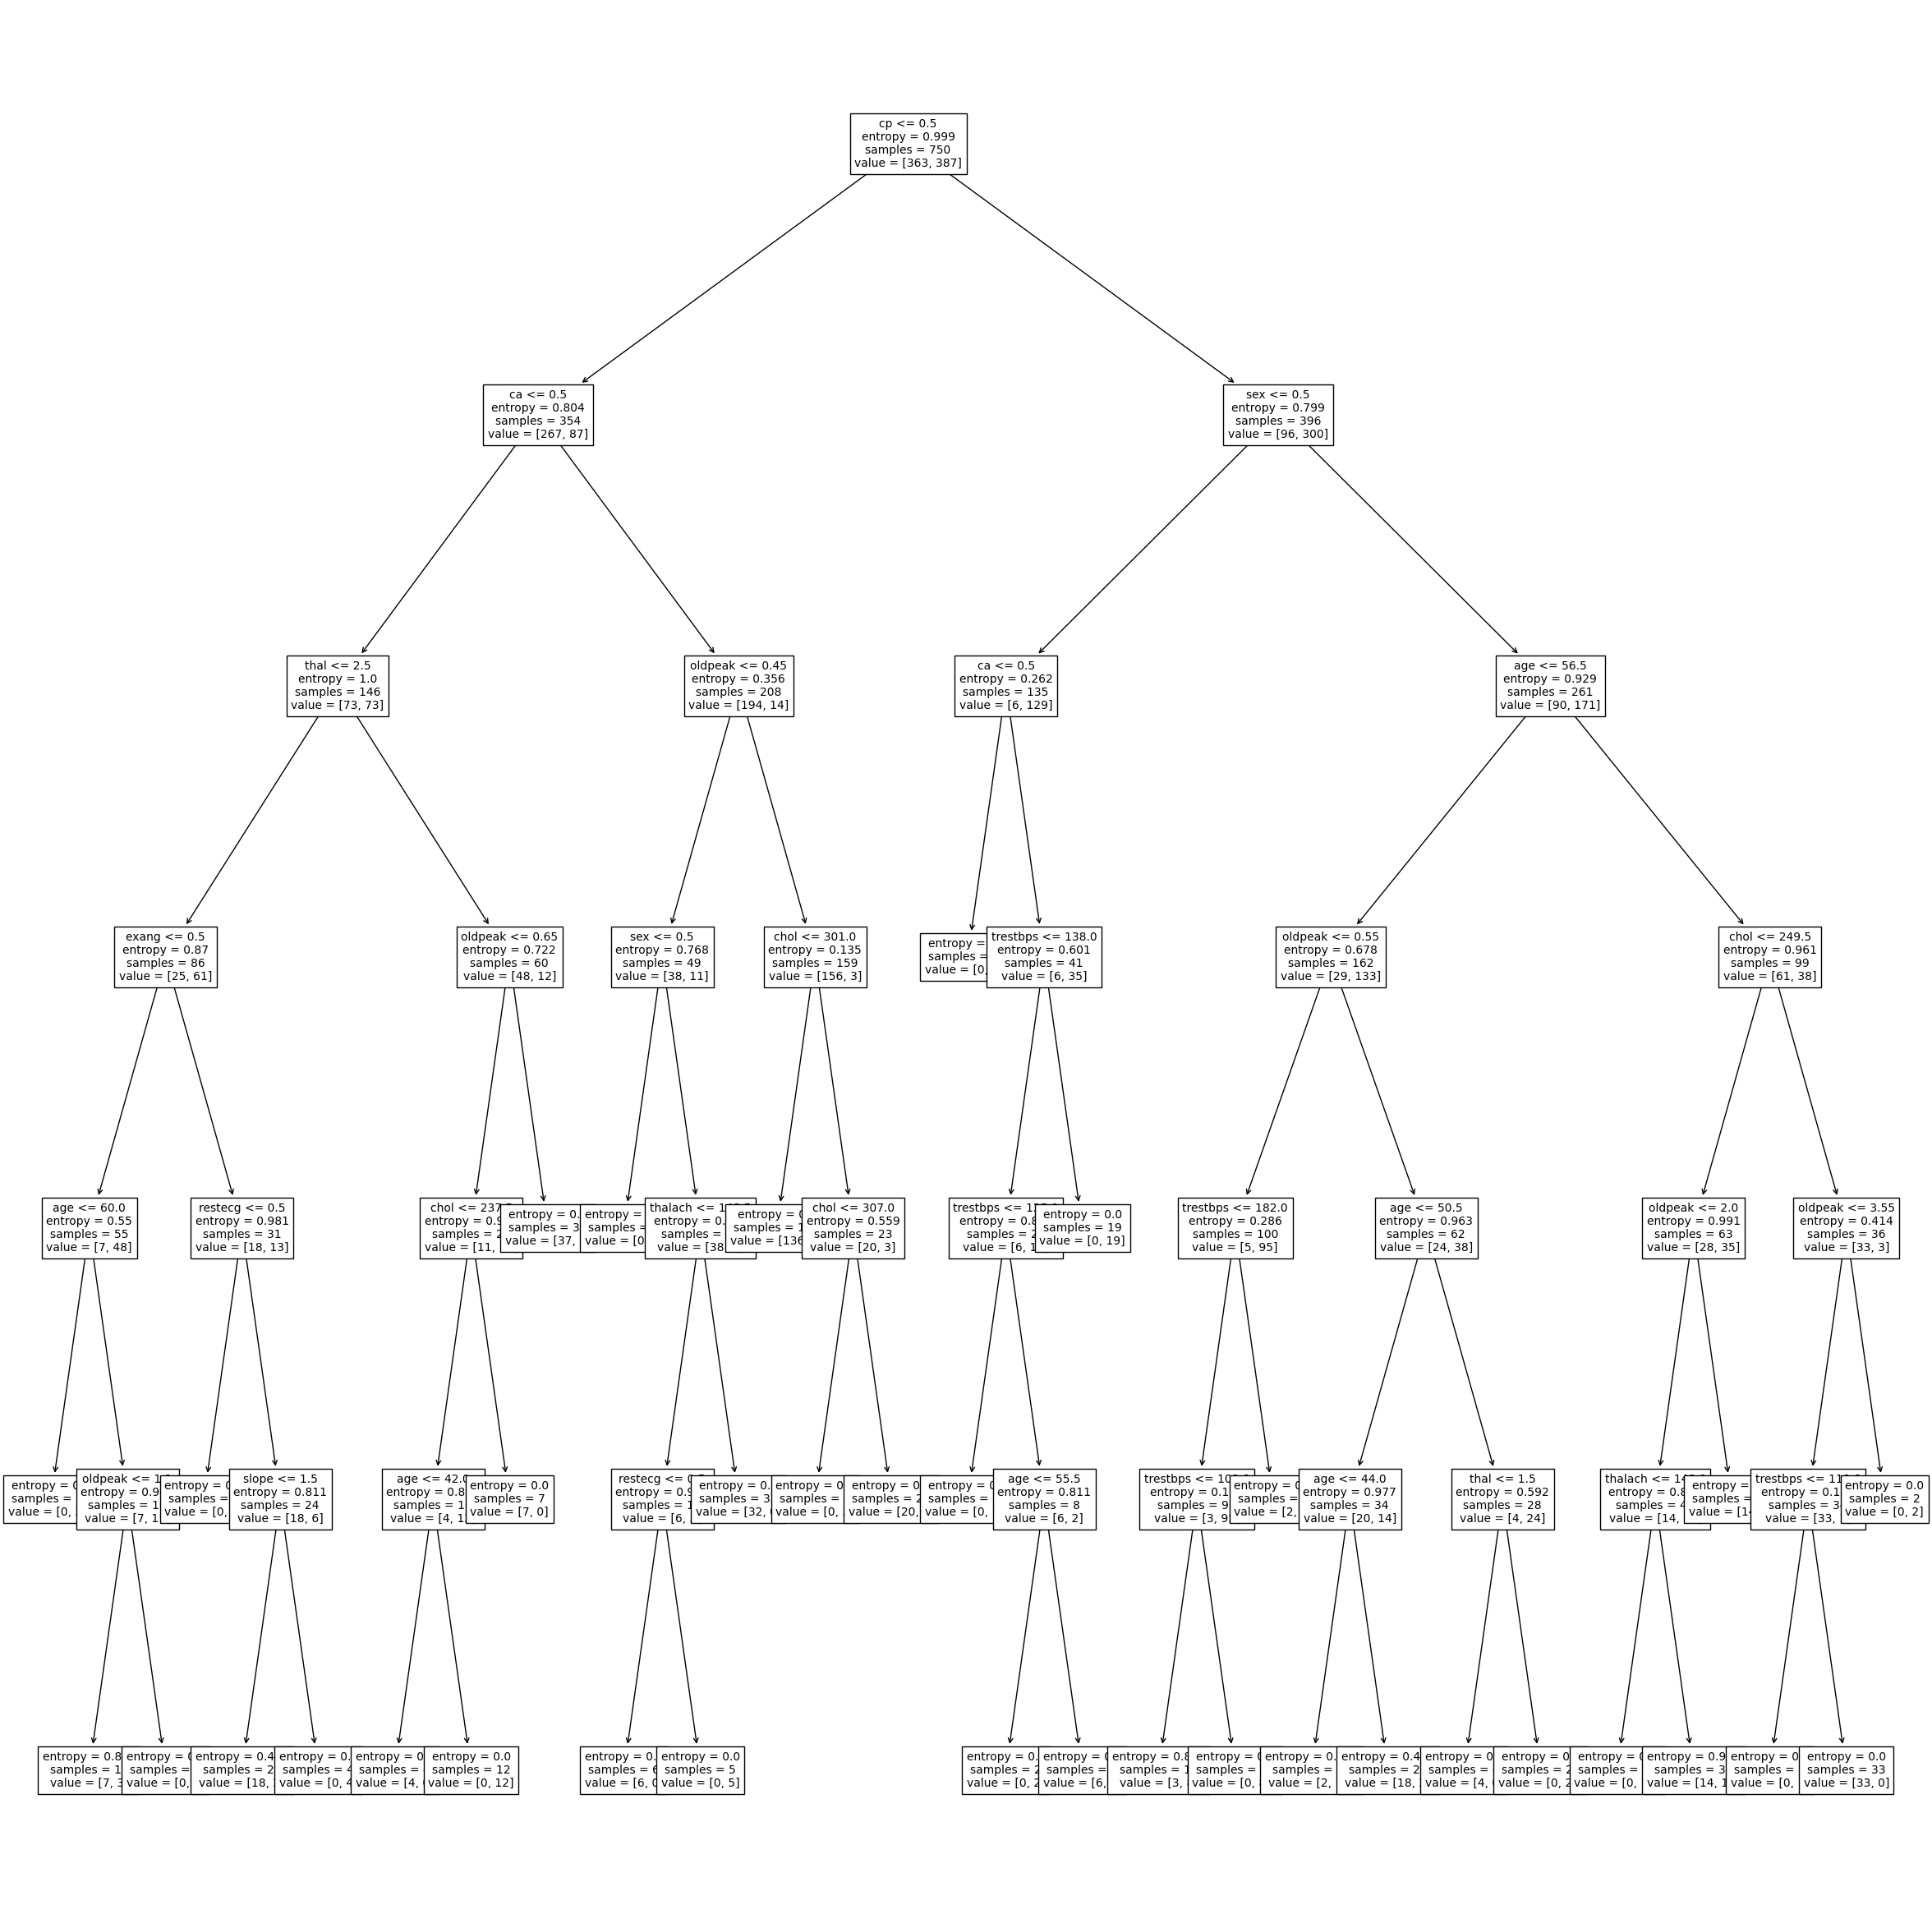

In [153]:
plt.figure(figsize=(30,30))
plot_tree(clf, feature_names = list(X_train.columns), fontsize=10)
plt.show()

[Text(0.46875, 0.9285714285714286, 'x[2] <= 0.5\nentropy = 0.999\nsamples = 750\nvalue = [363, 387]'),
 Text(0.275, 0.7857142857142857, 'x[11] <= 0.5\nentropy = 0.804\nsamples = 354\nvalue = [267, 87]'),
 Text(0.17, 0.6428571428571429, 'x[12] <= 2.5\nentropy = 1.0\nsamples = 146\nvalue = [73, 73]'),
 Text(0.08, 0.5, 'x[8] <= 0.5\nentropy = 0.87\nsamples = 86\nvalue = [25, 61]'),
 Text(0.04, 0.35714285714285715, 'x[0] <= 60.0\nentropy = 0.55\nsamples = 55\nvalue = [7, 48]'),
 Text(0.02, 0.21428571428571427, 'entropy = 0.0\nsamples = 37\nvalue = [0, 37]'),
 Text(0.06, 0.21428571428571427, 'x[9] <= 1.1\nentropy = 0.964\nsamples = 18\nvalue = [7, 11]'),
 Text(0.04, 0.07142857142857142, 'entropy = 0.881\nsamples = 10\nvalue = [7, 3]'),
 Text(0.08, 0.07142857142857142, 'entropy = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.12, 0.35714285714285715, 'x[6] <= 0.5\nentropy = 0.981\nsamples = 31\nvalue = [18, 13]'),
 Text(0.1, 0.21428571428571427, 'entropy = 0.0\nsamples = 7\nvalue = [0, 7]'),
 T

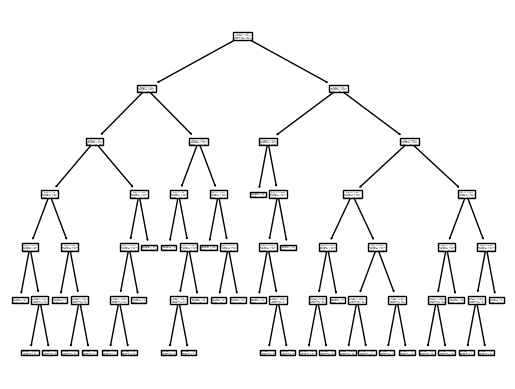

In [154]:
plot_tree(clf)

In [155]:
# creating features importance serie
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

cp          0.219803
age         0.141557
oldpeak     0.139078
ca          0.112060
sex         0.079768
chol        0.073005
thal        0.065932
trestbps    0.065221
thalach     0.035222
restecg     0.032443
exang       0.020947
slope       0.014963
fbs         0.000000
dtype: float64

In [200]:
# Hyperparameters space
param_space = {
    'criterion': ['entropy', 'gini'],
    'max_depth': list(range(2, 5, 1)),
    'min_samples_split': [10,20,30,40],
    'min_samples_leaf': [1, 5, 10, 20, 50],
    'max_leaf_nodes': [None, 10, 20, 30]
}


# calling classifier
clf_grid = DecisionTreeClassifier()

# running search
grid_search_tree = GridSearchCV(estimator=clf_grid,
                                param_grid=param_space,
                                scoring='roc_auc',
                                cv=15)
# running search
grid_search_tree.fit(X, Y.values)

# Meilleur modèle
best_parameters = grid_search_tree.best_params_
best_auc = grid_search_tree.best_score_
print('best parameters: ' + str(best_parameters))
print('best auc: ' + str(best_auc))

best parameters: {'criterion': 'entropy', 'max_depth': 4, 'max_leaf_nodes': None, 'min_samples_leaf': 20, 'min_samples_split': 20}
best auc: 0.934919308632544


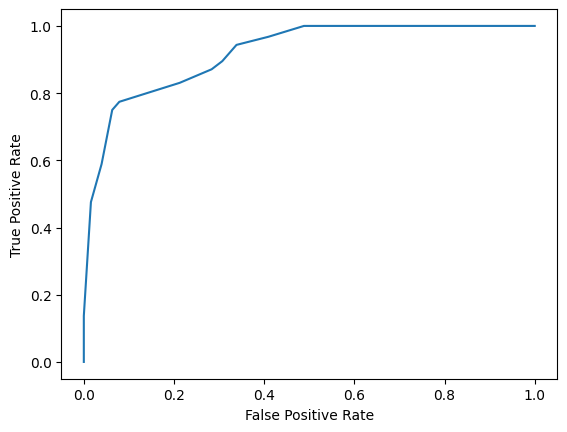

In [157]:
# Appel de la classification
clf_best = DecisionTreeClassifier(criterion= 'entropy', max_depth=4, min_samples_split = 0.07, random_state= 25)

# Définition des variable
Y = data['target']
X = data.drop(labels=['target'], axis=1)

# splitting into train test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=42)

# running search
clf_best.fit(X_train, Y_train)

# prediction
estimate_best = clf_best.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(Y_test,  estimate_best)
# Roc Curve

plt.plot(fpr,tpr)

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [158]:
# auc
print(auc(fpr,tpr))



0.9197358394716789


L’AUC ROC de notre modèle se situe bien au-dessus de celui d’un modèle non-informatif et en-dessous de celui d’un modèle parfait. Avec 73% d’AUC ROC, il s’agit d’un modèle assez performant.

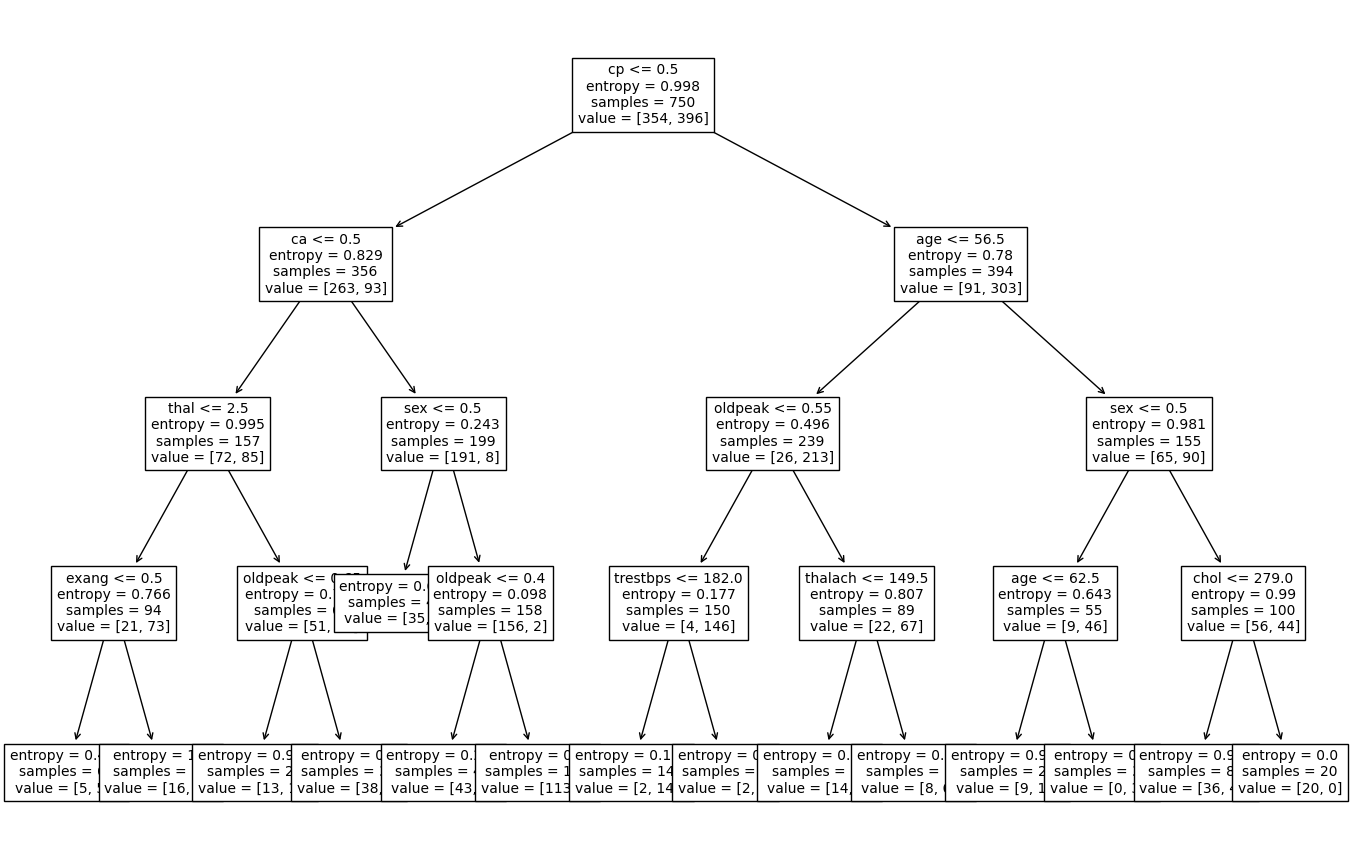

In [159]:
# plotting tree
plt.figure(figsize=(17,11))
plot_tree(clf_best, feature_names = list(X_train.columns), fontsize=10)
plt.show()

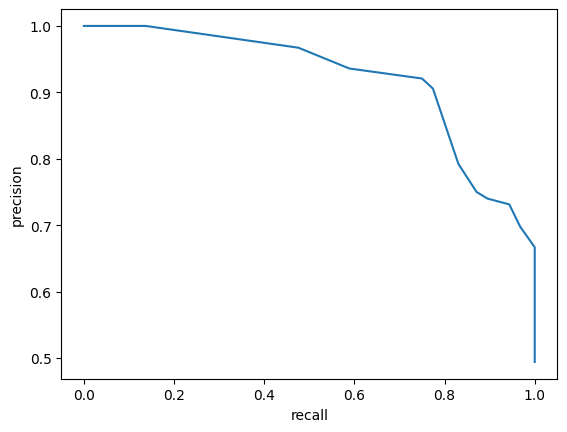

In [160]:
precision, recall, _ = precision_recall_curve(Y_test,  estimate_best)

# getting pr curve

plt.plot(recall, precision)

plt.ylabel('precision')
plt.xlabel('recall')
plt.show()


### Logistic regression

In [161]:
# calling classifier
clf_lr = LogisticRegression(solver='liblinear')

# fitting on data
clf_lr = clf_lr.fit(X_train, Y_train)
# estimating on test
estimate_lr = clf_lr.predict_proba(X_test)[:,1]
true = Y_test
# building AUC
fpr, tpr, _ = roc_curve(Y_test,  estimate_lr)
auc_lr = auc(fpr, tpr)

print(auc_lr) 

0.9126873253746508


In [162]:
rs = range(1000)
auc_list_lr = []
for random_state in rs:
    # model variables definitions
    Y = data['target']
    X = data.drop(labels=['target'], axis=1)

    # splitting into train test
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=random_state)

    # calling decisiontree classifier
    clf_lr = LogisticRegression(solver='liblinear')
    #criterion= 'entropy', max_depth=max_depth, min_samples_split=0.1
    # fitting on data
    clf_lr = clf_lr.fit(X_train, Y_train)
    # estimating on test
    estimate_lr = clf_lr.predict_proba(X_test)[:,1]
    # AUC
    fpr, tpr, _ = roc_curve(Y_test,  estimate_lr)
    auc_lr = auc(fpr, tpr)
    auc_list_lr.append(auc_lr)

print(np.mean(auc_list_lr))

0.9153247136694819


### Random Forest

In [163]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split

# Définition du modèle Random Forest
clf_rf = RandomForestClassifier(n_estimators=3, max_depth=4)

# Split test/train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

# Ajustement des données
clf_rf.fit(X_train, Y_train)

# Prédiction des probabilités pour la classe positive
estimate_rf = clf_rf.predict_proba(X_test)[:, 1]

# Calcul de l'AUC
fpr_rf, tpr_rf, _ = roc_curve(Y_test, estimate_rf)
auc_rf = auc(fpr_rf, tpr_rf)

# Autres métriques d'évaluation
predictions_rf = clf_rf.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, predictions_rf))
print("Classification Report:\n", classification_report(Y_test, predictions_rf))
print("AUC:", auc_rf)


Accuracy: 0.8247011952191236
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       120
           1       0.83      0.83      0.83       131

    accuracy                           0.82       251
   macro avg       0.82      0.82      0.82       251
weighted avg       0.82      0.82      0.82       251

AUC: 0.9253816793893129


### Cross Validation

### Decision Tree

In [178]:
auc_list_decision_tree = []
rs = range(1000)
for random_state in rs: 

    # splitting into train test
    X_train1, X_valid, Y_train1, Y_valid = train_test_split(X_train, Y_train, test_size = 0.20, random_state=random_state)
    # calling decisiontree classifier
    clf_cv = DecisionTreeClassifier(
        max_depth=6,
        min_samples_split=0.01,
        criterion='entropy')
    # fitting on data
    clf_cv = clf_cv.fit(X_train1, Y_train1)
    # estimating on test
    estimate_cv = clf_cv.predict_proba(X_valid)[:,1]

    
    #  AUC
    fpr_cv, tpr_cv, _ = roc_curve(Y_valid,  estimate_cv)
    auc_cv = auc(fpr_cv, tpr_cv)
    auc_list_decision_tree.append(auc_cv)

    #Moyenne des AUC
    mean_auc_decision_tree = np.mean(auc_list_decision_tree)

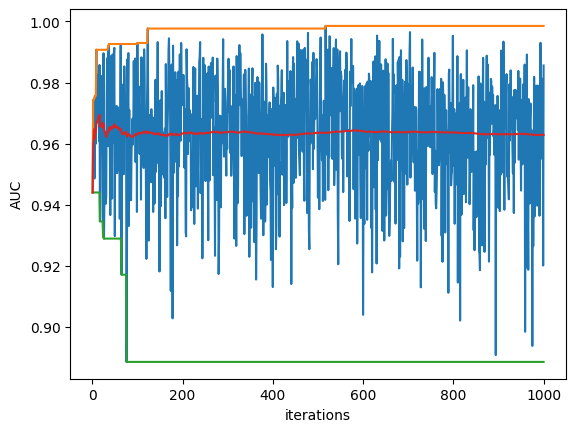

In [179]:
# convergence de la CrossValidation
iterations = range(1,len(rs)+1)
cum_max_list = [max(auc_list_decision_tree[:i+1]) for i in range(len(auc_list_decision_tree))]
cum_min_list = [min(auc_list_decision_tree[:i+1]) for i in range(len(auc_list_decision_tree))]
cum_mean_list = [np.mean(auc_list_decision_tree[:i+1]) for i in range(len(auc_list_decision_tree))]

plt.plot(iterations,auc_list_decision_tree)
plt.plot(iterations,cum_max_list)
plt.plot(iterations,cum_min_list)
plt.plot(iterations,cum_mean_list)

plt.ylabel('AUC')
plt.xlabel('iterations')
plt.show()

### Logistic Regression

In [180]:
auc_list_logistic_regression = []
rs = range(1000)
for random_state in rs: 

    # splitting into train test
    X_train1, X_valid, Y_train1, Y_valid = train_test_split(X_train, Y_train, test_size = 0.20, random_state=random_state)
    # calling decisiontree classifier
    clf_cv = LogisticRegression(solver='liblinear')
    # fitting on data
    clf_cv = clf_cv.fit(X_train1, Y_train1)
    # estimating on test
    estimate_cv = clf_cv.predict_proba(X_valid)[:,1]

    
    #  AUC
    fpr_cv, tpr_cv, _ = roc_curve(Y_valid,  estimate_cv)
    auc_cv = auc(fpr_cv, tpr_cv)
    auc_list_logistic_regression.append(auc_cv)

    #Moyenne des AUC
    mean_auc_logistic_regression = np.mean(auc_list_logistic_regression)

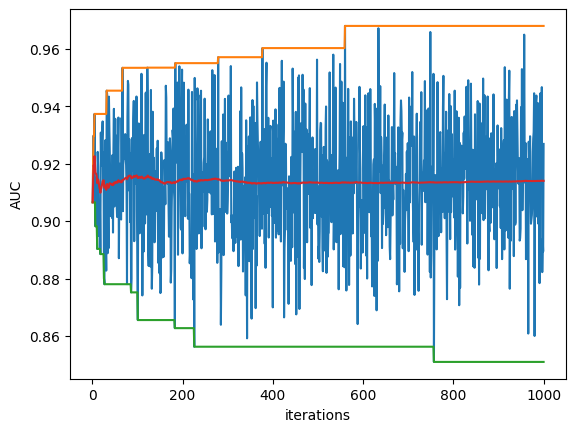

In [181]:
# convergence de la CrossValidation
iterations = range(1,len(rs)+1)
cum_max_list = [max(auc_list_logistic_regression[:i+1]) for i in range(len(auc_list_logistic_regression))]
cum_min_list = [min(auc_list_logistic_regression[:i+1]) for i in range(len(auc_list_logistic_regression))]
cum_mean_list = [np.mean(auc_list_logistic_regression[:i+1]) for i in range(len(auc_list_logistic_regression))]

plt.plot(iterations,auc_list_logistic_regression)
plt.plot(iterations,cum_max_list)
plt.plot(iterations,cum_min_list)
plt.plot(iterations,cum_mean_list)

plt.ylabel('AUC')
plt.xlabel('iterations')
plt.show()

### Random Forest

In [182]:
auc_list_random_forest = []
rs = range(1000)
for random_state in rs: 

    # splitting into train test
    X_train1, X_valid, Y_train1, Y_valid = train_test_split(X_train, Y_train, test_size = 0.20, random_state=random_state)
    # calling decisiontree classifier
    clf_cv = RandomForestClassifier(n_estimators=3, max_depth=4)
    # fitting on data
    clf_cv = clf_cv.fit(X_train1, Y_train1)
    # estimating on test
    estimate_cv = clf_cv.predict_proba(X_valid)[:,1]

    
    #  AUC
    fpr_cv, tpr_cv, _ = roc_curve(Y_valid,  estimate_cv)
    auc_cv = auc(fpr_cv, tpr_cv)
    auc_list_random_forest.append(auc_cv)

    #Moyenne des AUC
    mean_auc_random_forest = np.mean(auc_list_random_forest)

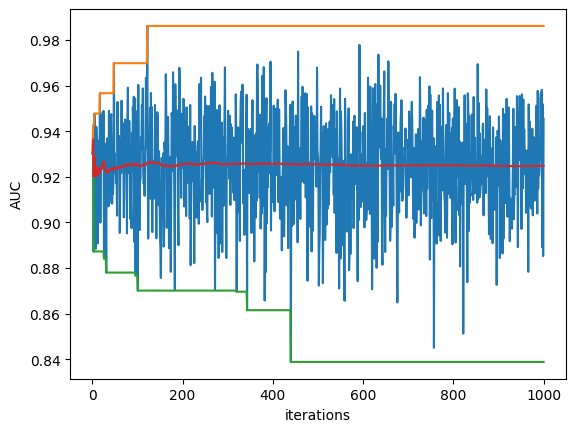

In [183]:
# convergence de la CrossValidation
iterations = range(1,len(rs)+1)
cum_max_list = [max(auc_list_random_forest[:i+1]) for i in range(len(auc_list_random_forest))]
cum_min_list = [min(auc_list_random_forest[:i+1]) for i in range(len(auc_list_random_forest))]
cum_mean_list = [np.mean(auc_list_random_forest[:i+1]) for i in range(len(auc_list_random_forest))]

plt.plot(iterations,auc_list_random_forest)
plt.plot(iterations,cum_max_list)
plt.plot(iterations,cum_min_list)
plt.plot(iterations,cum_mean_list)

plt.ylabel('AUC')
plt.xlabel('iterations')
plt.show()

In [184]:
print("Decision tree : ", mean_auc_decision_tree)
print("Logistic Regression :", mean_auc_logistic_regression)
print("Random Forest : ", mean_auc_random_forest)

mean_auc_dict = {
    "Decision Tree": mean_auc_decision_tree,
    "Logistic Regression": mean_auc_logistic_regression,
    "Random Forest": mean_auc_random_forest
}

print("\nL'algorithme qui a la meilleure précision en moyenne est le :", max(mean_auc_dict, key=mean_auc_dict.get))

Decision tree :  0.9628930426186202
Logistic Regression : 0.9140194291299254
Random Forest :  0.9248407207968836

L'algorithme qui a la meilleure précision en moyenne est le : Decision Tree


PCA

In [185]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [186]:
pca = PCA()
#scaller = StandardScaler()
#new_x = scaller.fit_transform(X)
new_x = pca.fit_transform(X)
len(pca.explained_variance_ratio_)

13

In [187]:
new_x[:,:2]

array([[-34.42172557, -18.33325367],
       [-42.39158995,  -4.04693836],
       [-41.71768201,  -8.08381963],
       ...,
       [ 28.17058747,  27.22874875],
       [  6.7477416 , -12.03050968],
       [-57.71786864,  36.29791061]])

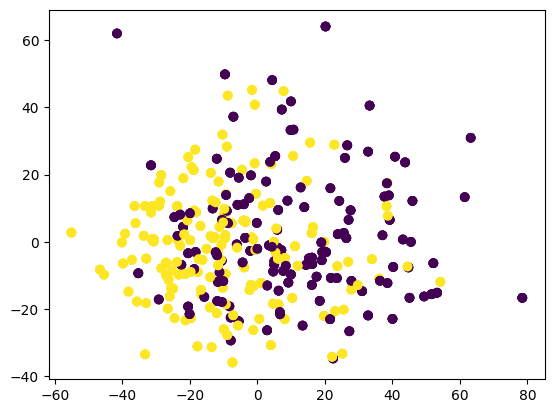

In [188]:
plt.scatter(x=new_x[:,1],y=new_x[:,2],c=Y)

In [189]:
Y

0       0
1       0
3       0
4       0
5       1
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1001, dtype: int64